In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from skimage import transform  
import shutil

In [2]:
def plot_points_on_images(coordinates_dir, image_dir, output_dir):
    """
    Plots points on images based on coordinates from separate files and saves modified images.

    Parameters:
        coordinates_dir (str): Path to the folder containing coordinate files.
        image_dir (str): Path to the folder containing images.
        output_dir (str): Path to the folder where modified images will be saved.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over files in the coordinates directory
    for filename in os.listdir(coordinates_dir):
        if filename.endswith(".txt"):
            # Extract the image name from the coordinate file name
            image_name = os.path.splitext(filename)[0] + '.png'
            image_path = os.path.join(image_dir, image_name)

            # Read the image
            img = cv2.imread(image_path)

            # Read coordinates from the coordinate file
            with open(os.path.join(coordinates_dir, filename), 'r') as coord_file:
                coordinates = [line.strip() for line in coord_file.readlines()]

            # Draw points on the image for each set of coordinates
            for i, coord in enumerate(coordinates, 1):
                x, y = map(int, coord.split(','))
                # Generate a unique color for each point
                color = (0, 255, 0)  # Green color

                # Increase the size of the dot
                cv2.circle(img, (x, y), 5, color, -1)

                # Label the point with a number
                cv2.putText(img, str(i), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

            # Save the modified image in the output folder
            output_path = os.path.join(output_dir, f"modified_{image_name}")
            cv2.imwrite(output_path, img)

            # Display the image with points using matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"Image with Points: {image_name}")
            plt.axis('off')
            plt.show()

    print("Done plotting points on images and saving modified images in the output folder.")


In [3]:
# Define the paths to your coordinate directory, image directory, and output directory
COORDINATES_DIR = '../data/final-data/resized/annotations/5noktapellgregory37-38/test'  # Path to the folder containing coordinate files
IMAGE_DIR = '../data/final-data/resized/images/5noktapellgregory37-38'  # Path to the folder containing images
OUTPUT_DIR = '../data/final-data/output_images/'  # Path to the folder where modified images will be saved

In [4]:
def plot_random_images_with_coordinates(coordinates_dir, image_dir, num_images_to_plot=10):
    """
    Plots points on random images based on coordinates from separate files and displays them.

    Parameters:
        coordinates_dir (str): Path to the folder containing coordinate files.
        image_dir (str): Path to the folder containing images.
        num_images_to_plot (int): Number of random images to plot (default is 10).
    """
    # List all coordinate files in the directory
    coordinate_files = [filename for filename in os.listdir(coordinates_dir) if filename.endswith(".txt")]

    # Randomly select num_images_to_plot coordinate files
    selected_files = random.sample(coordinate_files, num_images_to_plot)

    # Iterate over the selected coordinate files
    for filename in selected_files:
        # Extract the image name from the coordinate file name
        image_name = os.path.splitext(filename)[0] + '.png'
        image_path = os.path.join(image_dir, image_name)

        # Read the image
        img = cv2.imread(image_path)

        # Read coordinates from the coordinate file
        with open(os.path.join(coordinates_dir, filename), 'r') as coord_file:
            coordinates = [line.strip() for line in coord_file.readlines()]

        # Draw points on the image for each set of coordinates
        for i, coord in enumerate(coordinates, 1):
            x, y = map(int, coord.split(','))
            print(x, y)
            # Generate a unique color for each point
            color = (0, 255, 0)  # Green color

            # Increase the size of the dot
            cv2.circle(img, (x, y), 5, color, -1)

            # Label the point with a number
            cv2.putText(img, str(i), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Display the image with points using matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"Image with Points: {image_name}")
        plt.axis('off')
        plt.show()

313 368
291 368
323 404
271 397
226 354


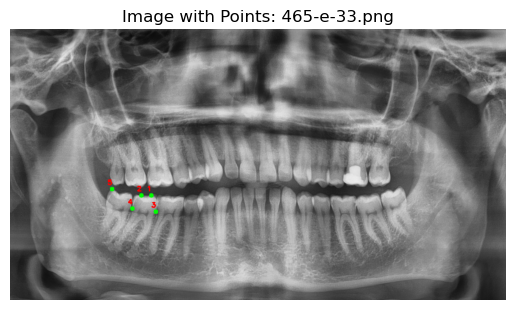

337 337
309 333
342 371
290 365
259 315


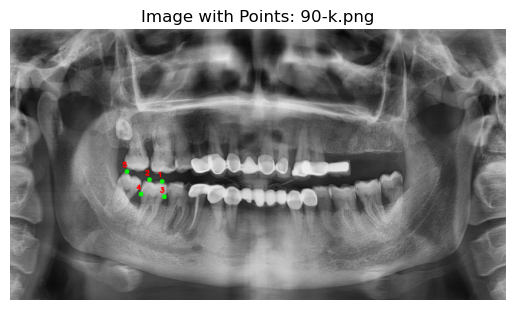

293 314
269 307
293 357
243 341
235 292


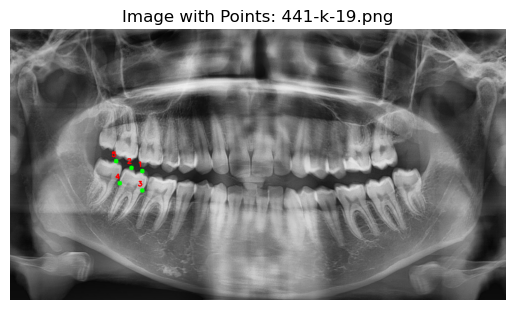

306 363
283 357
306 405
258 391
247 343


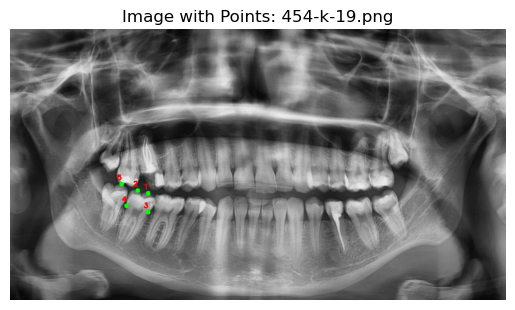

314 300
286 291
309 335
260 320
222 271


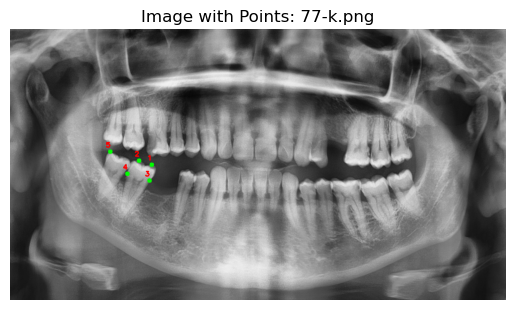

In [7]:
# Call the function to plot random images with points
plot_random_images_with_coordinates(COORDINATES_DIR, IMAGE_DIR, num_images_to_plot=5)

330 336
306 335
339 370
285 366
253 315


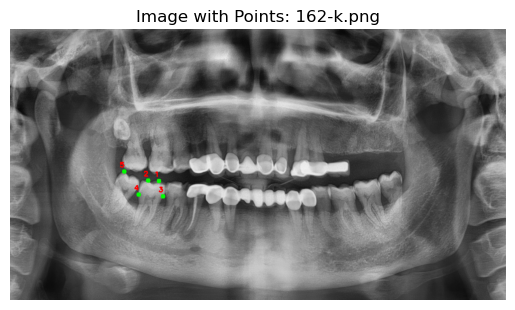

303 363
276 358
307 406
254 396
240 341


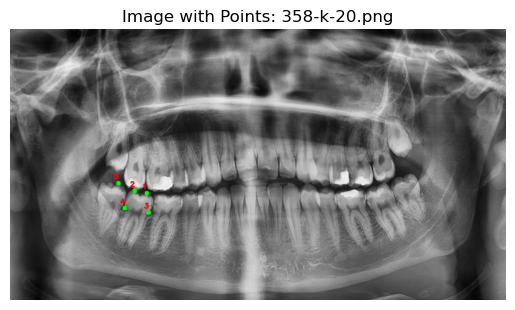

294 319
270 311
289 356
244 335
216 303


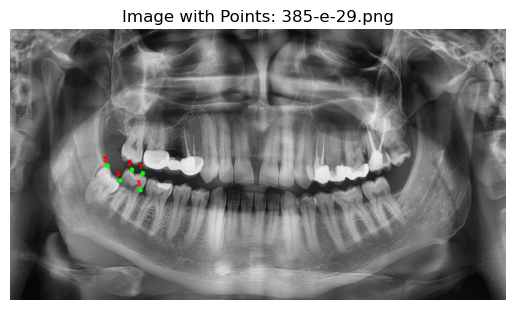

317 293
292 291
322 332
276 324
271 281


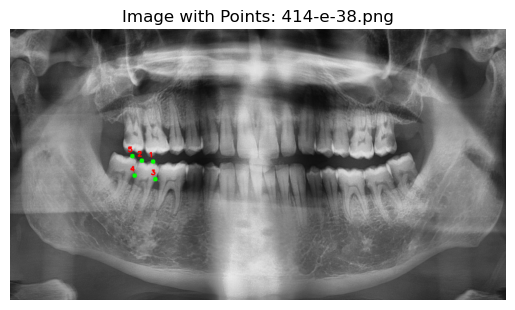

287 301
262 289
287 341
236 314
231 269


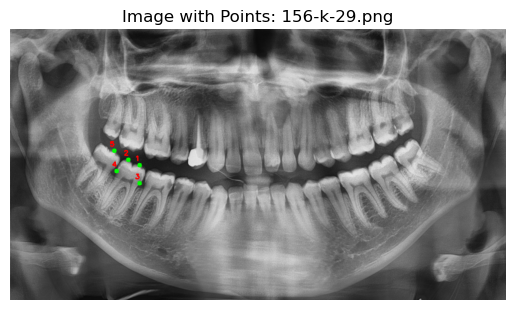

In [8]:
# Define the paths to your coordinate directory, image directory, and output directory
COORDINATES_DIR = '../data/fresh-data/resized/annotations/5noktapellgregory47-48/test'  # Path to the folder containing coordinate files
IMAGE_DIR = '../data/fresh-data/resized/images/5noktapellgregory47-48'  # Path to the folder containing images
# Call the function to plot random images with points
plot_random_images_with_coordinates(COORDINATES_DIR, IMAGE_DIR, num_images_to_plot=5)

330 336
306 335
339 370
285 366
253 315


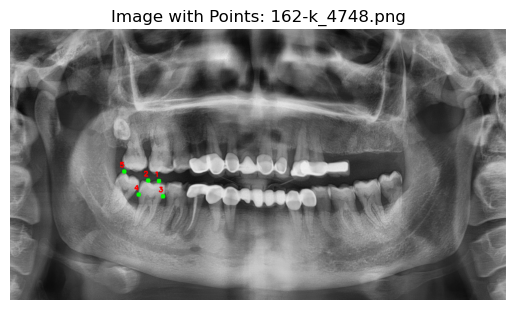

In [6]:
# Define the paths to your coordinate directory, image directory, and output directory
COORDINATES_DIR = '../data/fresh-data/resized/annotations/test'  # Path to the folder containing coordinate files
IMAGE_DIR = '../data/fresh-data/resized/images'  # Path to the folder containing images
plot_random_images_with_coordinates(COORDINATES_DIR, IMAGE_DIR, num_images_to_plot=1)

In [7]:
def plot_random_images_with_coordinates(coordinates_dir, image_dir, output_dir, num_images_to_plot=10):
    """
    Plots points on random images based on coordinates from separate files and saves them in an output folder.

    Parameters:
        coordinates_dir (str): Path to the folder containing coordinate files.
        image_dir (str): Path to the folder containing images.
        output_dir (str): Path to the output directory where the plotted images and coordinates will be saved.
        num_images_to_plot (int): Number of random images to plot (default is 10).
    """
    # List all coordinate files in the directory
    coordinate_files = [filename for filename in os.listdir(coordinates_dir) if filename.endswith(".txt")]

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Randomly select num_images_to_plot coordinate files
    selected_files = random.sample(coordinate_files, num_images_to_plot)

    # Iterate over the selected coordinate files
    for filename in selected_files:
        # Extract the image name from the coordinate file name
        image_name = os.path.splitext(filename)[0] + '.png'
        image_path = os.path.join(image_dir, image_name)
        annotation_source = os.path.join(coordinates_dir, filename)

        # Read the image
        img = cv2.imread(image_path)

        # Read coordinates from the coordinate file
        with open(annotation_source, 'r') as coord_file:
            coordinates = [line.strip() for line in coord_file.readlines()]

        # Draw points on the image for each set of coordinates
        for i, coord in enumerate(coordinates, 1):
            x, y = map(int, coord.split(','))
            # Generate a unique color for each point
            color = (0, 255, 0)  # Green color

            # Increase the size of the dot
            cv2.circle(img, (x, y), 5, color, -1)

            # Label the point with a number
            cv2.putText(img, str(i), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Save the image with points to the output directory
        output_path = os.path.join(output_dir, f"annotated_{image_name}")
        cv2.imwrite(output_path, img)

        # Save the annotation txt file to the output directory
        shutil.copy(annotation_source, os.path.join(output_dir, f"annotated_{filename}"))

        print(f"Image and annotation saved to {output_path}")

In [8]:
plot_random_images_with_coordinates(COORDINATES_DIR, IMAGE_DIR, OUTPUT_DIR, num_images_to_plot=1)

Image and annotation saved to ../data/fresh-data/output_images/annotated_133-e-45_3738.png


In [9]:
# Define the paths to your coordinate directory, image directory, and output directory
COORDINATES_DIR = '../data/fresh-data/annotations/'  # Path to the folder containing coordinate files
IMAGE_DIR = '../data/fresh-data/images/'  # Path to the folder containing images
OUTPUT_DIR = '../data/new-data/output_images/'  # Path to the folder where modified images will be saved

In [10]:
def plot_points_with_colors(coordinates_dir, predictions_dir, image_dir, num_images_to_plot=10):
    """
    Plots points on random images based on coordinates from separate files and displays them.

    Parameters:
        coordinates_dir (str): Path to the folder containing coordinate files.
        predictions_dir (str): Path to the folder containing prediction files.
        image_dir (str): Path to the folder containing images.
        num_images_to_plot (int): Number of random images to plot (default is 10).
    """
    # List all coordinate files in the directories
    coordinate_files = [filename for filename in os.listdir(coordinates_dir) if filename.endswith(".txt")]
    prediction_files = [filename for filename in os.listdir(predictions_dir) if filename.endswith(".txt")]

    # Randomly select num_images_to_plot coordinate files
    selected_files = random.sample(coordinate_files, num_images_to_plot)

    # Iterate over the selected coordinate files
    for filename in selected_files:
        # Extract the image name from the coordinate file name
        image_name = os.path.splitext(filename)[0] + '.png'
        image_path = os.path.join(image_dir, image_name)

        # Read the image
        img = cv2.imread(image_path)

        # Read coordinates from the coordinate file
        with open(os.path.join(coordinates_dir, filename), 'r') as coord_file:
            coordinates = [line.strip() for line in coord_file.readlines()]

        # Draw points from coordinates_dir in green
        for i, coord in enumerate(coordinates, 1):
            x, y = map(int, coord.split(','))
            # Green color for coordinates_dir points
            color = (0, 255, 0)  
            cv2.circle(img, (x, y), 5, color, -1)
            cv2.putText(img, str(i), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Read points from predictions_dir and draw them in red
        prediction_filename = os.path.join(predictions_dir, filename)
        if os.path.exists(prediction_filename):
            with open(prediction_filename, 'r') as pred_file:
                predictions = [line.strip() for line in pred_file.readlines()]
                for i, pred in enumerate(predictions, 1):
                    x, y = map(int, pred.split(','))
                    # Red color for predictions_dir points
                    color = (255, 0, 0)  
                    cv2.circle(img, (x, y), 5, color, -1)
                    cv2.putText(img, str(i), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Display the image with points using matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"Image with Points: {image_name}")
        plt.axis('off')
        plt.show()